<a href="https://colab.research.google.com/github/uyenbhku/CS114.N21/blob/main/VietnameseSarcasticHeadlineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vietnamese Sarcastic Headline Classification

Inspired by: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

## Team Information

**Team:** NSFW

**Members:**

|No.|Member|Student ID|
|:-:|:-:|:-:|
|1|[Nguyen Trong An](https://github.com/chongan0224)|21520548|
|2|[Bui Huynh Kim Uyen](https://github.com/uyenbhku)|21521659|
|3|[Nguyen Nguyen Giap](https://github.com/Paignn)|21522025|
|4|[Nguyen Bui Thanh Mai](https://github.com/21522320)|21522320|

**Instructor:** Msc. Pham Nguyen Truong An

**Phát biểu bài toán:**
- Mục tiêu: Phân loại các headline của các bài báo là sarcastic or not
- Input: headline một bài báo tiếng Việt (<= 50 ký tự) + đường dẫn đến bài báo đó, các ký tự encode dưới dạng UTF-8
- Output: 1: là headline mang tính sarcastic, 0 nếu ngược lại


Notebook này bao gồm end-to-end pipeline từ training đến serving phase.
Nếu chỉ muốn sử dụng serving, chỉ gần chạy các cells trong phần Installation và xuống dưới phần Playground để thử test với model

## Installation

In [ ]:
!pip install transformers

In [ ]:
!pip3 install tokenizers

In [ ]:
# A word segmentor recommended for PhoBERT
!pip install py_vncorenlp

## Get dataset

#### Crawl data

In [ ]:
!wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/NSFW.json

--2023-06-30 14:13:54--  https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/NSFW.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91978 (90K) [text/plain]
Saving to: ‘NSFW.json’

NSFW.json           100%[===================>]  89.82K  --.-KB/s    in 0.008s  

2023-06-30 14:13:54 (10.6 MB/s) - ‘NSFW.json’ saved [91978/91978]



In [ ]:
!wget https://raw.githubusercontent.com/KiRzEa/CS114/main/SarcasmData/SarcasmData_fixed.json

--2023-06-30 14:13:54--  https://raw.githubusercontent.com/KiRzEa/CS114/main/SarcasmData/SarcasmData_fixed.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 601730 (588K) [text/plain]
Saving to: ‘SarcasmData_fixed.json’

SarcasmData_fixed.j 100%[===================>] 587.63K  --.-KB/s    in 0.009s  

2023-06-30 14:13:54 (62.2 MB/s) - ‘SarcasmData_fixed.json’ saved [601730/601730]



In [ ]:
!wget https://raw.githubusercontent.com/HungStark/sarcasm_detection_dataset/main/sarcasm_detection_dataset.json

--2023-06-30 14:13:54--  https://raw.githubusercontent.com/HungStark/sarcasm_detection_dataset/main/sarcasm_detection_dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67965 (66K) [text/plain]
Saving to: ‘sarcasm_detection_dataset.json’

sarcasm_detection_d 100%[===================>]  66.37K  --.-KB/s    in 0.005s  

2023-06-30 14:13:54 (13.5 MB/s) - ‘sarcasm_detection_dataset.json’ saved [67965/67965]



In [ ]:
!wget https://raw.githubusercontent.com/TruongNoDame/Sarcasm-Detection/main/sarcasm_detection_dataset.json

--2023-06-30 14:13:54--  https://raw.githubusercontent.com/TruongNoDame/Sarcasm-Detection/main/sarcasm_detection_dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34773 (34K) [text/plain]
Saving to: ‘sarcasm_detection_dataset.json.1’

sarcasm_detection_d 100%[===================>]  33.96K  --.-KB/s    in 0s      

2023-06-30 14:13:55 (71.6 MB/s) - ‘sarcasm_detection_dataset.json.1’ saved [34773/34773]



In [ ]:
!wget https://raw.githubusercontent.com/Tlon9/CS114/main/sarcasm_detection_dataset.json

--2023-06-30 14:13:55--  https://raw.githubusercontent.com/Tlon9/CS114/main/sarcasm_detection_dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417641 (408K) [text/plain]
Saving to: ‘sarcasm_detection_dataset.json.2’

sarcasm_detection_d 100%[===================>] 407.85K  --.-KB/s    in 0.006s  

2023-06-30 14:13:55 (68.9 MB/s) - ‘sarcasm_detection_dataset.json.2’ saved [417641/417641]



In [ ]:
!wget https://raw.githubusercontent.com/npk7264/CS114/main/sarcasm_detection_dataset.json

--2023-06-30 14:13:55--  https://raw.githubusercontent.com/npk7264/CS114/main/sarcasm_detection_dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46203 (45K) [text/plain]
Saving to: ‘sarcasm_detection_dataset.json.3’

sarcasm_detection_d 100%[===================>]  45.12K  --.-KB/s    in 0.001s  

2023-06-30 14:13:55 (54.8 MB/s) - ‘sarcasm_detection_dataset.json.3’ saved [46203/46203]



In [ ]:
!wget https://raw.githubusercontent.com/Quan-Minh/CS114/main/sarcasm_detection_dataset.json

--2023-06-30 14:13:55--  https://raw.githubusercontent.com/Quan-Minh/CS114/main/sarcasm_detection_dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143228 (140K) [text/plain]
Saving to: ‘sarcasm_detection_dataset.json.4’

sarcasm_detection_d 100%[===================>] 139.87K  --.-KB/s    in 0.003s  

2023-06-30 14:13:55 (46.7 MB/s) - ‘sarcasm_detection_dataset.json.4’ saved [143228/143228]



In [ ]:
!wget https://raw.githubusercontent.com/tqnghia210/CS114/main/data_ne.json

--2023-06-30 14:13:55--  https://raw.githubusercontent.com/tqnghia210/CS114/main/data_ne.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43941 (43K) [text/plain]
Saving to: ‘data_ne.json’

data_ne.json        100%[===================>]  42.91K  --.-KB/s    in 0.002s  

2023-06-30 14:13:56 (17.4 MB/s) - ‘data_ne.json’ saved [43941/43941]



In [ ]:
!wget https://raw.githubusercontent.com/ngcthc/CS114-ML-Public/main/sarcasm_detection_dataset.json

--2023-06-30 14:13:56--  https://raw.githubusercontent.com/ngcthc/CS114-ML-Public/main/sarcasm_detection_dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26769 (26K) [text/plain]
Saving to: ‘sarcasm_detection_dataset.json.5’

sarcasm_detection_d 100%[===================>]  26.14K  --.-KB/s    in 0s      

2023-06-30 14:13:56 (69.2 MB/s) - ‘sarcasm_detection_dataset.json.5’ saved [26769/26769]



In [ ]:
!wget https://raw.githubusercontent.com/Kuma221203/CS114/main/sarcasm_detection_dataset.json

--2023-06-30 14:13:56--  https://raw.githubusercontent.com/Kuma221203/CS114/main/sarcasm_detection_dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90505 (88K) [text/plain]
Saving to: ‘sarcasm_detection_dataset.json.6’

sarcasm_detection_d 100%[===================>]  88.38K  --.-KB/s    in 0.003s  

2023-06-30 14:13:56 (32.3 MB/s) - ‘sarcasm_detection_dataset.json.6’ saved [90505/90505]



#### Classify JSON and JSONLine

In [ ]:
!mkdir json jsonlines

In [ ]:
!mv data* jsonlines/

In [ ]:
!mv Sar* json/

In [ ]:
!mv NSFW* jsonlines/

In [ ]:
!mv *.json HungStark.json
!mv HungS* json/

In [ ]:
!mv *.json.1 TruongNoDame.json
!mv Truon* json/

In [ ]:
!mv *json.2 Tlon9.json
!mv Tlon9* jsonlines/

In [ ]:
!mv *.json.3 npk.json
!mv npk* json/

In [ ]:
!mv *.json.4 Quan-Minh.json
!mv Quan-Minh.json jsonlines/

In [ ]:
!mv *.json.5 ngcthc.json
!mv ngct* json/

In [ ]:
!mv *.json.6 Kuma221203.json
!mv Kuma* json/

## Read files

In [ ]:
import json
import os
import pandas as pd

In [ ]:
%cd /content/

/content


In [ ]:
jsonlines_files = sorted(os.listdir('jsonlines'))

In [ ]:
jsonlines_files

['NSFW.json', 'Quan-Minh.json', 'Tlon9.json', 'data_ne.json']

In [ ]:
json_files = sorted(os.listdir('json'))

In [ ]:
json_files

['HungStark.json',
 'Kuma221203.json',
 'SarcasmData_fixed.json',
 'TruongNoDame.json',
 'ngcthc.json',
 'npk.json']

In [ ]:
dataset = []
df = pd.DataFrame(columns=['is_sarcastic', 'headline', 'article_link'])

In [ ]:
for json_file in json_files:
    with open(f'json/{json_file}', 'r') as file:
        content = file.read()
        parser = json.loads(content)
        temp = pd.DataFrame(parser)
        df = pd.concat([df, temp], axis=0, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  3755 non-null   object
 1   headline      3755 non-null   object
 2   article_link  3755 non-null   object
dtypes: object(3)
memory usage: 88.1+ KB


In [ ]:
df.describe()

,is_sarcastic,headline,article_link
count,3755,3755,3755
unique,2,3599,3600
top,0,,https://vnexpress.net/qua-cam-on-hon-30-ty-don...
freq,2109,7,4


In [ ]:
for jsonline_file in jsonlines_files:
    dataset = []
    with open(f'jsonlines/{jsonline_file}') as file:
        for line in file:
            line = line.rstrip(', ')
            try:
                line = json.loads(line)
            except: continue
            dataset.append(line)
        dataset = pd.DataFrame(dataset)
        df = pd.concat([df, dataset], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  6484 non-null   object
 1   headline      6484 non-null   object
 2   article_link  6484 non-null   object
dtypes: object(3)
memory usage: 152.1+ KB


In [ ]:
df.describe()

,is_sarcastic,headline,article_link
count,6484,6484,6484
unique,2,5308,5029
top,0,,https://tuoitre.vn/ai-phat-hien-them-nhieu-duo...
freq,4229,8,8


## Preprocess training data

### Impute missing values

Let's check if there are any empty headlines or article_link

In [ ]:
df[df.article_link=='']

,is_sarcastic,headline,article_link


In [ ]:
df[df.headline=='']

,is_sarcastic,headline,article_link
3443,0,,https://vnexpress.net/thit-heo-khong-thuoc-die...
3448,0,,https://vnexpress.net/nha-pho-co-ha-noi-bi-ha-...
3453,0,,https://vnexpress.net/hlv-bo-dao-nha-ca-ngoi-t...
3462,0,,https://vnexpress.net/can-thi-bao-nhieu-do-duo...
3467,0,,https://vnexpress.net/ngoai-tinh-voi-ai-461888...
3472,0,,https://vnexpress.net/12-hoc-sinh-lien-quan-vu...
3504,1,,https://cuoi.tuoitre.vn/su-that-ve-cac-ong-bo-...
4622,0,,https://tuoitre.vn/khien-trach-chu-tich-tinh-k...


Since the number of missing headlines is quite small, I will add headline manually

In [ ]:
df.at[3443, 'headline'] = "Thịt heo không thuộc diện bình ổn giá"

In [ ]:
df[df.article_link == 'https://vnexpress.net/thit-heo-khong-thuoc-dien-binh-on-gia-4618797.html']

,is_sarcastic,headline,article_link
3443,0,Thịt heo không thuộc diện bình ổn giá,https://vnexpress.net/thit-heo-khong-thuoc-die...


In [ ]:
df.at[3448, 'headline'] = 'Nhà phố cổ Hà Nội bị hạ giá hàng chục tỷ đồng'
df.at[3453, 'headline'] = 'HLV Bồ Đào Nha ca ngợi tinh thần đồng đội của Ronaldo'
df.at[3462, 'headline'] = 'Cận thị bao nhiêu độ được mổ mắt?'
df.at[3467, 'headline'] = 'Ngoại tình với AI'
df.at[3472, 'headline'] = '12 học sinh liên quan vụ lộ đề thi lớp 10'
df.at[3504, 'headline'] = 'Sự thật về các ông bố trông con hiện nay'
df.at[4622, 'headline'] = 'Khiển trách chủ tịch tỉnh Kiên Giang, cảnh cáo thứ trưởng Bộ Xây dựng'

Finish!!! 💃

In [ ]:
df[df.headline=='']

,is_sarcastic,headline,article_link


### Remove duplicates

There are 1109 completely duplicated rows => keep the first row and remove all duplicates of that row

In [ ]:
df.duplicated(subset=['is_sarcastic', 'headline', 'article_link']).sum()

1109

In [ ]:
df = df.drop_duplicates(subset=['is_sarcastic', 'headline', 'article_link'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5375 entries, 0 to 6483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  5375 non-null   object
 1   headline      5375 non-null   object
 2   article_link  5375 non-null   object
dtypes: object(3)
memory usage: 168.0+ KB


Check if there are any rows which have the same content but labeled different

In [ ]:
df.duplicated(subset=['headline', 'article_link']).sum()

18

There are some paradox here, but the number is quite low so I will analyze the error manually too

In [ ]:
df[df.duplicated(subset=['headline', 'article_link'])]

,is_sarcastic,headline,article_link
3489,1,Chuyên gia Michelin âm thầm đánh giá quán hủ t...,https://cuoi.tuoitre.vn/chuyen-gia-michelin-am...
3542,1,Lãi suất cho vay cao có nguyên nhân ngân hàng ...,https://tuoitre.vn/lai-suat-cho-vay-cao-co-ngu...
3873,0,Vì sao gọi là răng khôn?,https://cuoi.tuoitre.vn/vi-sao-goi-la-rang-kho...
3877,0,Nhân viên 'giãy đành đạch' không chịu đi làm q...,https://cuoi.tuoitre.vn/nhan-vien-giay-danh-da...
3880,0,Ảnh chế tràn ngập sau khi Michelin không 'chiề...,https://cuoi.tuoitre.vn/anh-che-tran-ngap-sau-...
4085,1,Pogba: 'Tôi như già đi 10 tuổi trong bảy tháng...,https://vnexpress.net/pogba-toi-nhu-gia-di-10-...
5766,1,"Huyền thoại Rod Stewart từ bỏ Rock'n Roll, thử...",https://kenh14.vn/huyen-thoai-rod-stewart-tu-b...
5811,1,Một địa điểm ở Việt Nam được Charlie Puth và d...,https://kenh14.vn/mot-dia-diem-o-viet-nam-duoc...
5813,1,"Chương trình: ''Làm đẹp từ tâm, nâng tầm nhan ...",https://kenh14.vn/chuong-trinh-lam-dep-tu-tam-...
5814,1,Bác sĩ Yến Nhi chia sẻ hành trình giúp hàng tr...,https://kenh14.vn/bac-si-yen-nhi-chia-se-hanh-...


In [ ]:
df

,is_sarcastic,headline,article_link
0,1,'Chỉ có tiền mới làm vợ vui thôi',https://cuoi.tuoitre.vn/chi-co-tien-moi-lam-vo...
1,1,Người đàn ông đứng hình 3 giây khi đập mặt vào...,https://cuoi.tuoitre.vn/nguoi-dan-ong-dung-hin...
2,1,Hai gymer ngơ ngác trước anh lao công nâng tạ ...,https://cuoi.tuoitre.vn/hai-gymer-ngo-ngac-tru...
3,1,Những tác hại của thuốc lá - Phần 1,https://cuoi.tuoitre.vn/nhung-tac-hai-cua-thuo...
4,1,Sấm nổ ngang tai khi con gái kêu mẹ 'trời mưa ...,https://cuoi.tuoitre.vn/sam-no-ngang-tai-khi-c...
...,...,...,...
6479,1,Gặp gỡ Nhà Xoài Đây: Mẹ 9x chia sẻ quan điểm n...,https://kenh14.vn/gap-go-nha-xoai-day-me-9x-ch...
6480,1,CADMIUM - nữ sinh 2k6 khuấy đảo Rap Việt lần đ...,https://kenh14.vn/cadmium-nu-sinh-2k6-khuay-da...
6481,1,"Đem tiền về quê sống thử 1 tháng, chàng trai n...",https://kenh14.vn/dem-tien-ve-que-song-thu-1-t...
6482,1,"Thanh niên nhớ quay quắt vị cơm tấm, bún bò kh...",https://kenh14.vn/thanh-nien-nho-quay-quat-vi-...


Since the content of cuoi.tuoitre.vn is sarcastic, I will remove the record 573

In [ ]:
df = df.drop([500])

There is nothing sarcastic in this headline... https://tuoitre.vn/lai-suat-cho-vay-cao-co-n

In [ ]:
df = df.drop([3542])

This headline cannot be categorised as sarcasm!! Although it was collected from cuoi.tuoitre.vn

In [ ]:
df = df.drop([4211, 7])

In [ ]:
df = df.drop([4353, 3500])

In [ ]:
df = df.drop([3494])

In [ ]:
df = df.drop([4085])

In [ ]:
df = df.drop([5766])

In [ ]:
df = df.drop([5811])

In [ ]:
df = df.drop([5813])

In [ ]:
df = df.drop([5814])

In [ ]:
df = df.drop([5815])

In [ ]:
df = df.drop([5818])

In [ ]:
df = df.drop([5820])

In [ ]:
df = df.drop([5821])

In [ ]:
df = df.drop([5844, 5841, 5823, 5822])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 6483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  5355 non-null   object
 1   headline      5355 non-null   object
 2   article_link  5355 non-null   object
dtypes: object(3)
memory usage: 167.3+ KB


I finished cleaning!

Now I will check if any article link link to different headline :)

In [ ]:
df.duplicated(subset=['article_link']).sum()

326

In [ ]:
df[df.duplicated(subset=['article_link'])]

,is_sarcastic,headline,article_link
298,0,Huy động toàn dân bảo vệ an ninh Tổ quốc trên ...,https://nhandan.vn/thong-cao-bao-chi-ky-hop-th...
312,0,Federer hạnh phúc khi Djokovic lập kỷ lục Gran...,https://vnexpress.net/hlv-argentina-hy-vong-me...
329,1,'Cuộc chiến' ô tô điện gay cấn ngay từ khâu 'c...,https://cuoi.tuoitre.vn/cuoc-chien-o-to-dien-g...
563,1,"'Lộ mặt thật', YouTuber bị chê... xấu trai đến...",https://cuoi.tuoitre.vn/lo-mat-that-youtuber-b...
651,1,Khi Đàn Ông Gọi Điện Thoại Xin Lỗi,https://cuoi.tuoitre.vn/o-xi-pho-ve-que-an-tet...
...,...,...,...
5524,0,Bạn đã biết cách kích hoạt chế độ SOS trên điệ...,https://tuoitre.vn/ban-da-biet-cach-kich-hoat-...
5525,0,"Chợt nghe một bài hát hay, bạn có biết cách dù...",https://tuoitre.vn/chot-nghe-mot-bai-hat-hay-b...
5731,1,Phim doanh thu 0 đồng vì cặp nam chính chuyên ...,https://kenh14.vn/phim-doanh-thu-0-dong-vi-cap...
5783,1,Vợ cũ Đan Trường khoe ảnh gia đình hạnh phúc d...,https://kenh14.vn/vo-cu-dan-truong-khoe-anh-gi...


After analyzing, I feel that there are some human mistake in collecting the data (hazz) and as multiple teams participating in collecting data, there may be some overlapping.

In [ ]:
df = df.drop_duplicates(subset=['article_link'], keep='first')

I finished! Now I'll check if there are any duplicated headlines from the same news

In [ ]:
df.duplicated(subset=['headline']).sum()

41

In [ ]:
df[df.duplicated(subset=['headline'])]

,is_sarcastic,headline,article_link
240,0,Giải Báo Nhân Dân - Dấu ấn năm của người làm b...,https://nhandan.vn/giai-bao-nhan-dan-dau-an-na...
3050,0,Chiều cao phụ thuộc phần lớn vào di truyền?,https://tuoitre.vn/chieu-cao-phu-thuoc-phan-lo...
3398,0,Ngân hàng Nhà nước tiếp tục hạ lãi suất điều hành,https://antv.gov.vn/kinh-te-5/ngan-hang-nha-nu...
3547,0,Tham nhũng vặt luôn có mặt trên từng cây số,Tham nhũng vặt luôn có mặt trên từng cây số - ...
3620,0,Giải cứu hàng trăm người bị mua bán qua biên giới,https://www.youtube.com/watch?v=DhRmbDF9M0Q
4115,0,Chủ tịch nước Võ Văn Thưởng thăm đảo Phú Quý,https://vnexpress.net/chu-tich-nuoc-vo-van-thu...
5327,0,Những vụ việc người dân quan tâm,https://tuoitre.vnhttps://tuoitre.vn/playlist/...
5760,1,Phim The Idol có nội dung hạ thấp phụ nữ,https://kenh14.vn/phim-the-idol-ha-thap-phu-nu...
5770,1,BLACKPINK sẽ có kì nghỉ ngắn trước khi tiếp tụ...,https://kenh14.vn/blackpink-se-co-ki-nghi-ngan...
5866,0,Canh bún ‘nhiều tên gọi nhất TP.HCM’: 8 người ...,https://thanhnien.vn//canh-bun-nhieu-ten-goi-n...


For simplicity, I'll just remove and keep the first line

In [ ]:
df = df.drop_duplicates(subset=['headline'], keep='first')

OK! Now I've done removing duplicates!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 6483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  4988 non-null   object
 1   headline      4988 non-null   object
 2   article_link  4988 non-null   object
dtypes: object(3)
memory usage: 155.9+ KB


### Digitalize data so the computer can understand


As the datatype when we read the file is object, we need to convert/encode content to numbers

#### Convert `is_sarcastic` values to intergers

In [ ]:
import numpy as np

In [ ]:
# datatype
df = df.astype({'is_sarcastic': "uint8"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 6483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  4988 non-null   uint8 
 1   headline      4988 non-null   object
 2   article_link  4988 non-null   object
dtypes: object(2), uint8(1)
memory usage: 121.8+ KB


#### Encode with language model

Mr. An suggests using https://github.com/VinAIResearch/PhoBERT




##### Word segmented

In [ ]:
!mkdir vncorenlp

In [ ]:
import py_vncorenlp

# Automatically download VnCoreNLP components from the original repository
# and save them in some local machine folder
py_vncorenlp.download_model(save_dir='/content/vncorenlp')

# Load the word and sentence segmentation component
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')

text = "Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."

output = rdrsegmenter.word_segment(text)

print(output)

['Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội .', 'Bà Lan , vợ ông Chúc , cũng làm_việc tại đây .']


In [ ]:
for i, row in df.iterrows():
    try:
        left_part, right_part = df.at[i, 'headline'].rsplit('-', 1)
    except: continue
    if right_part == ' Tuổi Trẻ Online':
        df.at[i,'headline'] = left_part

In [ ]:
for i, row in df.iterrows():
    k = rdrsegmenter.word_segment(df.at[i, 'headline'])
    df.at[i, 'headline'] = ' '.join(k)


In [ ]:
df.at[1023, 'headline']

"Túi_xách ' bể cá di_động ' của Nhật khiến dân_tình xôn_xao"

##### Encode article links

Let's see, I see that the links are long, but most of them have the same content as the headline. The question is whether article link can provide any useful information?

In fact, some newspaper is believed to tend to be more sarcastic while some papers are believed to provide legitimate information. So how can we utilize this information? It's the URL!

As we may know that common pattern for the URLs is http(s)://(domain name of the newspaper)/(content). Therefore, by extracting the domain name and encoding it, we may provide useful information to the model

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
import re # regex

Visit here to understand my regex pattern
https://regex101.com/r/cebEnF/1

In [ ]:
re.search(r'^(?:https?://)?(?:www.)?(\w+(?:[.-]\w+)*)\b', \
        'www.cuoi.tuoitre.vn/somthing/ss/s/ssd/chuyen-gia-michelin-am-tham-danh-gia-quan-hu-tieu-binh-dan-20230617174701624.htm').groups()[0]

'cuoi.tuoitre.vn'

In [ ]:
def get_domain_name(link):
    return re.search(r'^(?:https?://)?(?:www.)?(\w+(?:[.-]\w+)*)\b', link).groups()[0]

In [ ]:
df['domain_name'] = df.apply(lambda row: get_domain_name(row['article_link']), axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  4988 non-null   uint8 
 1   headline      4988 non-null   object
 2   article_link  4988 non-null   object
 3   domain_name   4988 non-null   object
dtypes: object(3), uint8(1)
memory usage: 121.9+ KB


In [ ]:
df[['domain_name']]

,domain_name
0,cuoi.tuoitre.vn
1,cuoi.tuoitre.vn
2,cuoi.tuoitre.vn
3,cuoi.tuoitre.vn
4,cuoi.tuoitre.vn
...,...
4983,kenh14.vn
4984,kenh14.vn
4985,kenh14.vn
4986,kenh14.vn


In [ ]:
df.domain_name.unique()

array(['cuoi.tuoitre.vn', 'nhandan.vn', 'vtv.vn', 'vnexpress.net',
       '24h.com.vn', 'dantri.com.vn', 'tuoitre.vn', 'baothanhhoa.vn',
       'thanhnien.vn', 'vtc.vn', 'xabuon.com', 'facebook.com', 'we25.vn',
       'soha.vn', 'spiderum.com', 'Ba', 'antv.gov.vn',
       'video.vnexpress.net', 'youtube.com', 'laodong.vn',
       'doisongphapluat.com', 'kenh14.vn', 'vneconomy.vn',
       'thesaigontimes.vn', 'tuyengiao.vn',
       'phapluat.tuoitrethudo.com.vn', 'lifestyle.zingnews.vn',
       'doanhnghiepvn.vn', 'zingnews.vn', 'tech.zingnews.vn',
       'bongdaplus.vn', 'vov.vn', '2sao.vn', 'cuoituan.tuoitre.vn',
       'kienthuc.net.vn', 'nguoiduatin.vn', 'saostar.vn', 'vietnamnet.vn',
       'hhttps', 'tuoitre.vnhttps'], dtype=object)

Tới đây lại thấy human mistakes, chẳng hạn Ba??? hhttps?? tuoitre.vnhttps??? Tên miền lạ quá, check thử thì thấy đúng là human mistakes thiệt (như cell dưới nè) :) , well, vì số lượng nhỏ nên là mình típ tục sửa bằng tay...

Edit 1: Nếu nhìn ở cell trên không thấy human mistakes, vậy mistake từ tui (Uyên =)) ), tui nói vậy vì khi chạy lần 2 thì tới chỗ này nó bị lỗi, nên nếu mn chạy mà thấy cell ở đây lỗi thì xóa từ đây cho tới seem good giùm tui.

In [ ]:
df.iloc[[3273, 3951, 4379, 4381, 4382, 4383, 4384, 4385]][['headline', 'article_link', 'domain_name']]

,headline,article_link,domain_name
3273,Bàn về chính_sách không nhập_tịch vận_động_viê...,Bàn về chính sách không nhập tịch vận đ...,Ba
3951,Elon_Musk bị kiện vì thổi giá Dogecoin,hhttps://vnexpress.net/elon-musk-bi-kien-vi-th...,hhttps
4379,"Đã bắt Y Thô_Ayun , một trong những nghi phạm ...",https://tuoitre.vnhttps://tuoitre.vn/video/vu-...,tuoitre.vnhttps
4381,Podcast : Cô_giáo Lê_Thị_Dung được giảm 45 thá...,https://tuoitre.vnhttps://podcast.tuoitre.vn/p...,tuoitre.vnhttps
4382,Cách uống trà tiết_lộ bạn bị_động hay chủ_động...,https://tuoitre.vnhttps://cuoi.tuoitre.vn/cach...,tuoitre.vnhttps
4383,Jennie_Blackpink bị Cnet tố ' lười_biếng ' khi...,https://tuoitre.vnhttps://cuoi.tuoitre.vn/jenn...,tuoitre.vnhttps
4384,"Bữa ăn trên máy_bay : Ngon hay_dở , sang hay x...",https://tuoitre.vnhttps://cuoituan.tuoitre.vn/...,tuoitre.vnhttps
4385,Nhạc_sĩ Khắc_Huề : Nhạc tiền_chiến đã từng ăn_...,https://tuoitre.vnhttps://cuoituan.tuoitre.vn/...,tuoitre.vnhttps


Row 3273, vì ko có link nên best practice là drop lun he

In [ ]:
df = df.drop([3273])

In [ ]:
df.at[3951, 'article_link'] = 'https://vnexpress.net/elon-musk-bi-kien-vi-thoi-gia-dogecoin-4612891.html'
df.at[4379, 'article_link'] = 'https://tuoitre.vn/video/vu-tan-cong-2-tru-so-ubnd-xa-o-dak-lak-da-bat-47-nghi-pham-lien-quan-co-ke-cam-dau-144372.htm'
df.at[4381, 'article_link'] = 'https://podcast.tuoitre.vn/podcast-co-giao-le-thi-dung-duoc-giam-45-thang-tu-tand-tinh-nghe-an-giai-thich-gi-ve-chuyen-nay-3217.htm'
df.at[4382, 'article_link'] = 'https://cuoi.tuoitre.vn/cach-uong-tra-tiet-lo-ban-bi-dong-hay-chu-dong-tim-kiem-tinh-yeu-20230614103228045.htm'
df.at[4383, 'article_link'] = 'https://cuoi.tuoitre.vn/jennie-blackpink-bi-cnet-to-luoi-bieng-khi-bat-ngo-roi-concert-20230615163555364.htm'
df.at[4384, 'article_link'] = 'https://cuoituan.tuoitre.vn/bua-an-tren-may-bay-ngon-hay-do-sang-hay-xoang-20230607083900181.htm'
df.at[4385, 'article_link'] = 'https://cuoituan.tuoitre.vn/nhac-si-khac-hue-nhac-tien-chien-da-tung-an-khach-20230607092225963.htm'

Ok.. mình lại clean xong, thử check lại nèoooo

In [ ]:
df['domain_name'] = df.apply(lambda row: get_domain_name(row['article_link']), axis=1)

In [ ]:
df.domain_name.unique()

array(['cuoi.tuoitre.vn', 'nhandan.vn', 'vtv.vn', 'vnexpress.net',
       '24h.com.vn', 'dantri.com.vn', 'tuoitre.vn', 'baothanhhoa.vn',
       'thanhnien.vn', 'vtc.vn', 'xabuon.com', 'facebook.com', 'we25.vn',
       'soha.vn', 'spiderum.com', 'antv.gov.vn', 'video.vnexpress.net',
       'youtube.com', 'laodong.vn', 'doisongphapluat.com', 'kenh14.vn',
       'vneconomy.vn', 'thesaigontimes.vn', 'tuyengiao.vn',
       'phapluat.tuoitrethudo.com.vn', 'lifestyle.zingnews.vn',
       'doanhnghiepvn.vn', 'zingnews.vn', 'tech.zingnews.vn',
       'bongdaplus.vn', 'vov.vn', '2sao.vn', 'cuoituan.tuoitre.vn',
       'kienthuc.net.vn', 'nguoiduatin.vn', 'saostar.vn', 'vietnamnet.vn',
       'podcast.tuoitre.vn'], dtype=object)

Uh huh, seem good, now encode it!!

In [ ]:
domain_names = sorted(list(df.domain_name.unique()))

In [ ]:
domain_names

['24h.com.vn',
 '2sao.vn',
 'antv.gov.vn',
 'baothanhhoa.vn',
 'bongdaplus.vn',
 'cuoi.tuoitre.vn',
 'cuoituan.tuoitre.vn',
 'dantri.com.vn',
 'doanhnghiepvn.vn',
 'doisongphapluat.com',
 'facebook.com',
 'kenh14.vn',
 'kienthuc.net.vn',
 'laodong.vn',
 'lifestyle.zingnews.vn',
 'nguoiduatin.vn',
 'nhandan.vn',
 'phapluat.tuoitrethudo.com.vn',
 'podcast.tuoitre.vn',
 'saostar.vn',
 'soha.vn',
 'spiderum.com',
 'tech.zingnews.vn',
 'thanhnien.vn',
 'thesaigontimes.vn',
 'tuoitre.vn',
 'tuyengiao.vn',
 'video.vnexpress.net',
 'vietnamnet.vn',
 'vneconomy.vn',
 'vnexpress.net',
 'vov.vn',
 'vtc.vn',
 'vtv.vn',
 'we25.vn',
 'xabuon.com',
 'youtube.com',
 'zingnews.vn']

In [ ]:
df.at[100, 'domain_name']

'nhandan.vn'

In [ ]:
domain_names.index(df.at[100, 'domain_name'])

16

In [ ]:
df['encoded_domain_name'] = df.apply(lambda row: domain_names.index(row['domain_name']), axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4987
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   is_sarcastic         4987 non-null   uint8 
 1   headline             4987 non-null   object
 2   article_link         4987 non-null   object
 3   domain_name          4987 non-null   object
 4   encoded_domain_name  4987 non-null   int64 
dtypes: int64(1), object(3), uint8(1)
memory usage: 328.7+ KB


##### Encode headlines

This usually took 17 minutes to encode, so if you just want to test my results or have fun with my model, please navigate to [Playground](https://colab.research.google.com/drive/1M5FrgKJrESES-vnnrCbLdRV4JZGWci6E#scrollTo=oXbT7lY7PvR0) part at the end of this notebook.

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

https://huggingface.co/docs/transformers/model_doc/phobert

In [ ]:
max_len = 0
for headline in df.headline:
    max_len = max(max_len, len(headline.split(' ')))

max_len

32

Max length of the given headline is 32. For sure, I'll accept a headline length 40 after segmented

In [ ]:
phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2", model_max_length=50, padding_side='right')

Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# INPUT TEXT MUST BE ALREADY WORD-SEGMENTED!
sentence = 'Chúng_tôi là những nghiên_cứu_viên .'

input_ids = torch.tensor([tokenizer.encode(sentence)])

with torch.no_grad():
    features = phobert(input_ids)  # Models outputs are now tuples


In [ ]:
features

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 3.8362e-02,  7.0703e-01, -1.3202e-01,  ..., -9.7446e-02,
           2.5193e-01,  3.4828e-01],
         [ 2.1041e-01,  2.3984e-01,  9.1060e-03,  ..., -3.2423e-04,
          -1.7492e-01,  4.0127e-02],
         [ 2.3745e-01,  9.8412e-03, -1.6509e-01,  ..., -4.3379e-02,
          -7.5782e-02,  4.6838e-02],
         ...,
         [ 2.3041e-01,  3.7583e-01,  1.7601e-02,  ...,  7.8472e-02,
           1.8661e-01,  5.2052e-02],
         [-2.3020e-01,  5.0276e-01,  1.0913e-01,  ..., -7.3261e-02,
           1.4339e-01,  1.8320e-01],
         [ 1.8813e-01,  6.2870e-01, -2.4809e-01,  ..., -4.8115e-02,
           1.6404e-01,  4.7204e-01]]]), pooler_output=tensor([[ 4.8969e-02,  2.9771e-02, -1.2664e-01, -1.7084e-03,  8.4410e-02,
         -2.6195e-01,  6.4106e-02, -2.2721e-01, -8.0225e-02,  1.9737e-01,
          7.9173e-02,  3.8484e-02, -4.9895e-02,  1.1739e-01, -1.9993e-01,
          3.0486e-02, -3.5442e-01,  1.5142e-01,  3.970

In [ ]:
input_ids = tokenizer(df['headline'].tolist(), padding=True)['input_ids']

In [ ]:
input_ids = torch.tensor(tokenizer(df['headline'].tolist(), padding=True)['input_ids'])

In [ ]:
input_ids.shape

torch.Size([4987, 50])

In [ ]:
attention_mask = torch.tensor(tokenizer(df['headline'].tolist(), padding='longest')['attention_mask'])

In [ ]:
attention_mask.shape

torch.Size([4987, 50])

In [ ]:
input_ids[attention_mask == 0] = 0

In [ ]:
input_ids

tensor([[    0,   104,   843,  ...,     0,     0,     0],
        [    0,   345,   651,  ...,     0,     0,     0],
        [    0,   716, 12540,  ...,     0,     0,     0],
        ...,
        [    0, 19507,   123,  ...,     0,     0,     0],
        [    0,  4172,   723,  ...,     0,     0,     0],
        [    0, 22014,  7502,  ...,     0,     0,     0]])

In [ ]:
#Load satisfied data into PhoBert => encoded features
with torch.no_grad():
    features = phobert(input_ids, attention_mask=attention_mask)

In [ ]:
encoded_headlines = features[0][:,0,:]

###### Concat into dataframe

In [ ]:
new_feature_names = [f'encoded_headline_{i}' for i in range(features[0][:,0,:].shape[1])]

In [ ]:
encoded_features = pd.DataFrame(encoded_headlines, columns=new_feature_names)

In [ ]:
encoded_features

,encoded_headline_0,encoded_headline_1,encoded_headline_2,encoded_headline_3,encoded_headline_4,encoded_headline_5,encoded_headline_6,encoded_headline_7,encoded_headline_8,encoded_headline_9,...,encoded_headline_758,encoded_headline_759,encoded_headline_760,encoded_headline_761,encoded_headline_762,encoded_headline_763,encoded_headline_764,encoded_headline_765,encoded_headline_766,encoded_headline_767
0,0.033422,0.305205,-0.417557,-0.330316,-0.025818,-0.120075,-0.151688,0.235589,-0.236982,0.234116,...,-0.102580,-0.261289,0.248752,0.516627,0.234362,0.163669,0.063705,-0.098685,0.152957,0.037526
1,0.073644,0.485370,0.055190,-0.669204,-0.163963,-0.075909,-0.041192,0.120644,-0.109598,0.141733,...,-0.039424,-0.286794,-0.059746,0.361260,0.157325,-0.085021,0.136786,-0.219867,0.176389,0.085574
2,-0.096734,0.093791,0.165336,-0.705018,0.070637,0.237961,0.126512,0.201941,-0.053225,0.085033,...,0.001373,-0.273495,-0.219930,0.495419,-0.008607,0.024792,0.081651,-0.543439,0.449472,0.257076
3,-0.132824,0.438649,-0.321680,-0.841378,-0.056313,-0.021127,0.115351,-0.017801,-0.414843,0.333651,...,-0.100712,-0.108610,-0.061869,0.344799,0.197393,-0.050434,-0.119511,-0.365258,0.621727,-0.070584
4,-0.051635,0.499025,-0.325871,-0.332288,-0.133100,-0.175451,-0.403884,-0.220232,-0.232696,0.018254,...,-0.299672,0.010025,0.118793,0.241738,-0.017925,0.002191,-0.330170,-0.120347,0.125586,-0.042315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,0.134450,0.225579,0.172906,-0.727169,-0.342575,-0.016906,0.076609,-0.074625,-0.183009,0.154480,...,-0.139581,0.004288,-0.025204,0.409946,0.069010,-0.038081,0.047906,-0.071381,0.369184,0.327146
4983,0.251519,0.203235,-0.060440,-0.715348,-0.054816,0.046977,-0.206125,-0.068869,-0.133184,0.171153,...,0.155975,-0.016802,-0.064703,0.428035,0.098874,-0.081417,-0.186875,-0.262130,0.027531,0.076329
4984,0.116489,0.317285,-0.148098,-0.456860,-0.095687,-0.143878,-0.360087,-0.131919,-0.230110,0.134124,...,-0.216931,-0.164060,0.147770,0.381159,0.235248,0.046145,-0.161988,-0.295474,0.281682,-0.135814
4985,-0.076961,0.417736,-0.058899,-0.654037,-0.263015,-0.042765,-0.091424,0.003117,-0.262053,0.181087,...,-0.238664,-0.181601,-0.066968,0.336676,0.041550,-0.107116,-0.121541,-0.081804,0.184818,0.190171


In [ ]:
df

,is_sarcastic,headline,article_link,domain_name,encoded_domain_name
0,1,' Chỉ có tiền mới làm vợ vui thôi ',https://cuoi.tuoitre.vn/chi-co-tien-moi-lam-vo...,cuoi.tuoitre.vn,5
1,1,Người đàn_ông đứng hình 3 giây khi đập mặt vào...,https://cuoi.tuoitre.vn/nguoi-dan-ong-dung-hin...,cuoi.tuoitre.vn,5
2,1,Hai gymer ngơ_ngác trước anh lao_công nâng tạ ...,https://cuoi.tuoitre.vn/hai-gymer-ngo-ngac-tru...,cuoi.tuoitre.vn,5
3,1,Những tác_hại của thuốc_lá - Phần 1,https://cuoi.tuoitre.vn/nhung-tac-hai-cua-thuo...,cuoi.tuoitre.vn,5
4,1,Sấm nổ ngang_tai khi con gái kêu mẹ ' trời mưa...,https://cuoi.tuoitre.vn/sam-no-ngang-tai-khi-c...,cuoi.tuoitre.vn,5
...,...,...,...,...,...
4983,1,Gặp_gỡ Nhà Xoài_Đây : Mẹ 9x chia_sẻ quan_điểm ...,https://kenh14.vn/gap-go-nha-xoai-day-me-9x-ch...,kenh14.vn,11
4984,1,CADMIUM - nữ_sinh 2k6 khuấy_đảo Rap_Việt lần đ...,https://kenh14.vn/cadmium-nu-sinh-2k6-khuay-da...,kenh14.vn,11
4985,1,"Đem tiền về quê sống thử 1 tháng , chàng trai ...",https://kenh14.vn/dem-tien-ve-que-song-thu-1-t...,kenh14.vn,11
4986,1,"Thanh_niên nhớ quay_quắt vị cơm tấm , bún_bò k...",https://kenh14.vn/thanh-nien-nho-quay-quat-vi-...,kenh14.vn,11


In [ ]:
df.reset_index(drop=True, inplace=True)
encoded_features.reset_index(drop=True, inplace=True)

In [ ]:
df = pd.concat([df, encoded_features], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Columns: 773 entries, is_sarcastic to encoded_headline_767
dtypes: float32(768), int64(1), object(3), uint8(1)
memory usage: 14.8+ MB


### Train/test/split


Since number of samples in the dataset is 4988, which is quite huge. I will split into 3 sets with the ratio 80/10/10

Remember to shuffle the dataset, and use stratified splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_set(X, y):
    X_train, X_devtest, y_train, y_devtest = train_test_split(X, y,
                                                    random_state=7,
                                                    stratify=y,
                                                    test_size=0.2)
    X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest,
                                                random_state=7,
                                                stratify=y_devtest,
                                                test_size=0.5)
    return X_train, y_train, X_dev, y_dev, X_test, y_test

## Experimenting


Using any of SVM or neural network is ok

- If using SVM => convert to numpy array

- If using neural network => use tensor, PyTorch Tensor is recommended


However, since we have no time to experiment (neural network costs a veryyyyy long time to train :) ) , just use SVM (and fine-tuned) and write conclusion for it.

We'll comeback later to use neural network

### SVM without article link

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
## without link
X = np.c_[ encoded_headlines ]
y = df['is_sarcastic'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)

In [ ]:
X_train, y_train, X_dev, y_dev, X_test, y_test = split_set(scaled_X, y)

#### Fine tuning

In [ ]:
X_traindev = np.vstack([X_train, X_dev])

In [ ]:
X_traindev.shape

(4488, 768)

In [ ]:
y_traindev = np.concatenate([y_train, y_dev])

In [ ]:
y_traindev.shape

(4488,)

In [ ]:
param_grid = {'C': np.logspace(-1, 3, 5),
              'gamma': np.logspace(-3, 1, 5),
              'kernel': ['rbf']}

cv = StratifiedShuffleSplit(n_splits=3, test_size=1/9, random_state=42)

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=cv)

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.818 total time=  10.3s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.828 total time=   8.4s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.828 total time=   9.5s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=  11.3s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=  10.4s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   9.2s
[CV 1/3] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.589 total time=  15.5s
[CV 2/3] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.589 total time=  22.7s
[CV 3/3] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.589 total time=  20.1s
[CV 1/3] END .....C=0.1, gamma=10.0, kernel=rbf;, score=0.589 total time=  12.0s
[CV 2/3] END .....C=0.1, gamma=10.0, kernel=rbf;, score=0.589 total time=  14.7s
[CV 3/3] END .....C=0.1, gamma=10.0, kernel=rbf

#### Train

In [ ]:
clf_svmrbf = SVC(C=10.0, gamma=.1, kernel='rbf', verbose=1, class_weight='balanced')
clf_svmrbf.fit(X_train, y_train)

[LibSVM]

SVC(C=10.0, class_weight='balanced', gamma=0.1, verbose=1)

#### Save pretrained model

In [ ]:
%cd /content/

/content


In [ ]:
import pickle

In [ ]:
filename = 'balanced_SVC.pkl'
pickle.dump(clf_svmrbf, open(filename, 'wb'))

In [ ]:
filename = 'imbalanced_SVC.pkl'
pickle.dump(clf_svmrbf, open(filename, 'wb'))

#### Load pretrained models

In [ ]:
import pickle
%cd /content/

/content


In [ ]:
## uncomment those lines if you want to use balanced model
# !wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/balanced_SVC.pkl
# clf_svmrbf = pickle.load(open('balanced_SVC.pkl', 'rb'))

--2023-06-30 14:55:52--  https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/balanced_SVC.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16958386 (16M) [application/octet-stream]
Saving to: ‘balanced_SVC.pkl.1’

balanced_SVC.pkl.1  100%[===================>]  16.17M  96.2MB/s    in 0.2s    

2023-06-30 14:55:53 (96.2 MB/s) - ‘balanced_SVC.pkl.1’ saved [16958386/16958386]



In [ ]:
!wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/imbalanced_SVC.pkl
clf_svmrbf = pickle.load(open('imbalanced_SVC.pkl', 'rb'))

--2023-06-30 14:56:32--  https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/imbalanced_SVC.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16946048 (16M) [application/octet-stream]
Saving to: ‘imbalanced_SVC.pkl.1’

imbalanced_SVC.pkl. 100%[===================>]  16.16M  --.-KB/s    in 0.05s   

2023-06-30 14:56:32 (298 MB/s) - ‘imbalanced_SVC.pkl.1’ saved [16946048/16946048]



#### Evaluate

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
y_preds = clf_svmrbf.predict(X_test)

##### Before handling imbalanced dataset

In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf} in dev set:\n"
    f"{metrics.classification_report(y_dev, clf_svmrbf.predict(X_dev))}\n"
)

Classification report for classifier SVC(C=10.0, gamma=0.1, verbose=1) in dev set:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       294
           1       0.83      0.81      0.82       205

    accuracy                           0.85       499
   macro avg       0.85      0.85      0.85       499
weighted avg       0.85      0.85      0.85       499




In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)

Classification report for classifier SVC(C=10.0, gamma=0.1, verbose=1):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       294
           1       0.83      0.83      0.83       205

    accuracy                           0.86       499
   macro avg       0.86      0.86      0.86       499
weighted avg       0.86      0.86      0.86       499




Confusion matrix:
[[259  35]
 [ 35 170]]


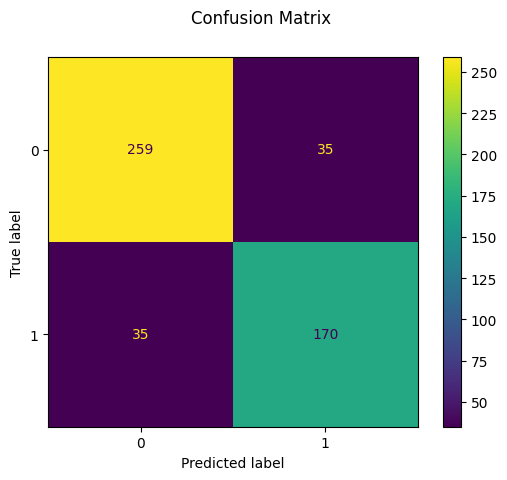

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

##### After handling

In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf} in dev set:\n"
    f"{metrics.classification_report(y_dev, clf_svmrbf.predict(X_dev))}\n"
)

Classification report for classifier SVC(C=10.0, class_weight='balanced', gamma=0.1, verbose=1) in dev set:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       294
           1       0.83      0.81      0.82       205

    accuracy                           0.85       499
   macro avg       0.85      0.85      0.85       499
weighted avg       0.85      0.85      0.85       499




In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)

Classification report for classifier SVC(C=10.0, class_weight='balanced', gamma=0.1, verbose=1):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       294
           1       0.83      0.83      0.83       205

    accuracy                           0.86       499
   macro avg       0.86      0.86      0.86       499
weighted avg       0.86      0.86      0.86       499




Confusion matrix:
[[259  35]
 [ 35 170]]


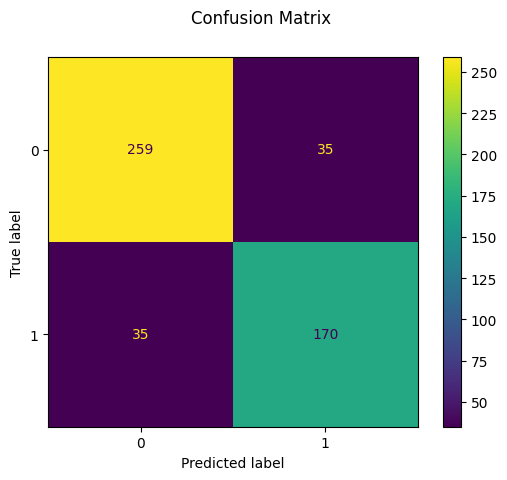

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### SVM with article link

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
X = np.c_[ encoded_headlines, df['encoded_domain_name'].values ]
y = df['is_sarcastic'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)

In [ ]:
X_train, y_train, X_dev, y_dev, X_test, y_test = split_set(scaled_X, y)

#### Fine tuning

In [ ]:
X_traindev = np.vstack([X_train, X_dev])

In [ ]:
X_traindev.shape

(4488, 769)

In [ ]:
y_traindev = np.concatenate([y_train, y_dev])

In [ ]:
y_traindev.shape

(4488,)

In [ ]:
param_grid = {'C': np.logspace(-1, 5, 7),
              'gamma': np.logspace(-2, 2, 5),
              'kernel': ['rbf']}

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=cv)

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
[CV 1/3] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.589 total time=  13.0s
[CV 2/3] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.589 total time=   8.1s
[CV 3/3] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.589 total time=  10.9s
[CV 1/3] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.589 total time=   8.9s
[CV 2/3] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.589 total time=   8.3s
[CV 3/3] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.589 total time=   8.9s
[CV 1/3] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.589 total time=  11.2s
[CV 2/3] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.589 total time=  16.5s
[CV 3/3] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.589 total time=   8.8s
[CV 1/3] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.589 total time=   8.1s
[CV 2/3] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.589 total time=   9.2s
[CV 3/3] END .....C=0.01, gamma=0.1, kernel=rbf

#### Train

In [ ]:
clf_svmrbf_l = SVC(C=10.0, gamma=0.001, kernel='rbf')
clf_svmrbf_l.fit(X_train, y_train)

SVC(C=10.0, gamma=0.001)

#### Save pretrained model

In [ ]:
%cd /content/

/content


In [ ]:
import pickle

In [ ]:
filename = 'balanced_SVC_with_link.pkl'
pickle.dump(clf_svmrbf_l, open(filename, 'wb'))

In [ ]:
filename = 'imbalanced_SVC_with_link.pkl'
pickle.dump(clf_svmrbf_l, open(filename, 'wb'))

#### Load pretrained model

In [ ]:
import pickle
%cd /content/

In [ ]:
# !wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/balanced_SVC_with_link.pkl
# clf_svmrbf_l = pickle.load(open('balanced_SVC_with_link.pkl', 'rb'))

In [ ]:
!wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/imbalanced_SVC_with_link.pkl
clf_svmrbf_l = pickle.load(open('imbalanced_SVC_with_link.pkl', 'rb'))

#### Evaluate

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
y_preds = clf_svmrbf_l.predict(X_test)

##### Before handling imbalanced dataset

In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf_l} in dev set:\n"
    f"{metrics.classification_report(y_dev, clf_svmrbf_l.predict(X_dev))}\n"
)

Classification report for classifier SVC(C=10.0, gamma=0.001) in dev set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       294
           1       0.95      0.89      0.92       205

    accuracy                           0.93       499
   macro avg       0.94      0.93      0.93       499
weighted avg       0.93      0.93      0.93       499




In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf_l}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)

Classification report for classifier SVC(C=10.0, gamma=0.001):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       294
           1       0.94      0.93      0.94       205

    accuracy                           0.95       499
   macro avg       0.95      0.95      0.95       499
weighted avg       0.95      0.95      0.95       499




Confusion matrix:
[[282  12]
 [ 14 191]]


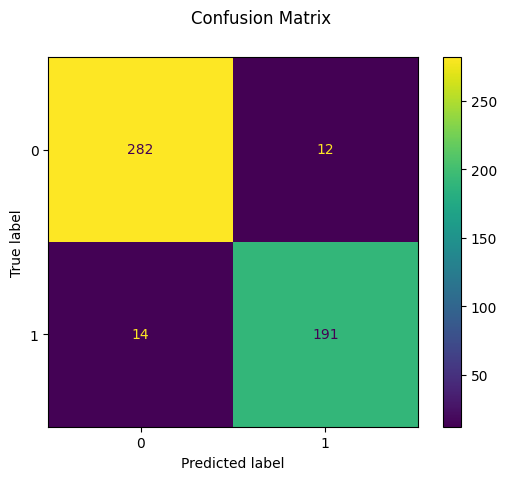

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

##### After handling

In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf_l} in dev set:\n"
    f"{metrics.classification_report(y_dev, clf_svmrbf_l.predict(X_dev))}\n"
)

Classification report for classifier SVC(C=10.0, class_weight='balanced', gamma=0.001) in dev set:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       294
           1       0.93      0.90      0.91       205

    accuracy                           0.93       499
   macro avg       0.93      0.93      0.93       499
weighted avg       0.93      0.93      0.93       499




In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf_l}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)

Classification report for classifier SVC(C=10.0, class_weight='balanced', gamma=0.001):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       294
           1       0.93      0.93      0.93       205

    accuracy                           0.94       499
   macro avg       0.94      0.94      0.94       499
weighted avg       0.94      0.94      0.94       499




Confusion matrix:
[[280  14]
 [ 14 191]]


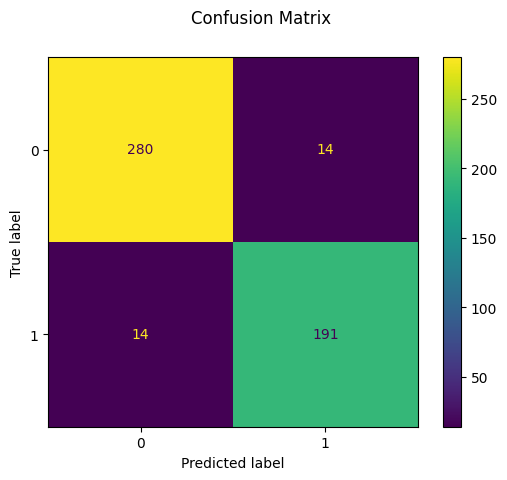

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Conclusion

### Error Analysis

#### Imbalanced dataset?
It can be seen that the dataset is quite imbalanced. However, after handling the imbalanced thing, there's no much change in the performance. Therefore, this might be not a problem.

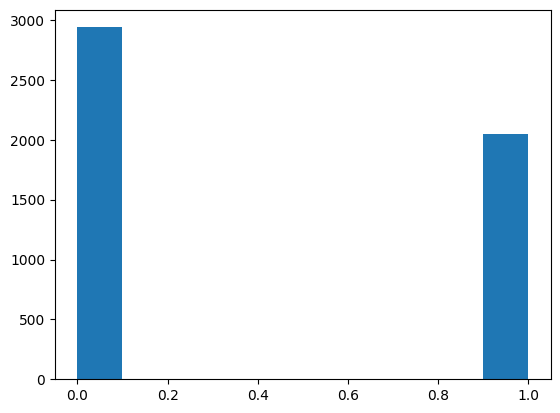

In [ ]:
plt.hist(y);

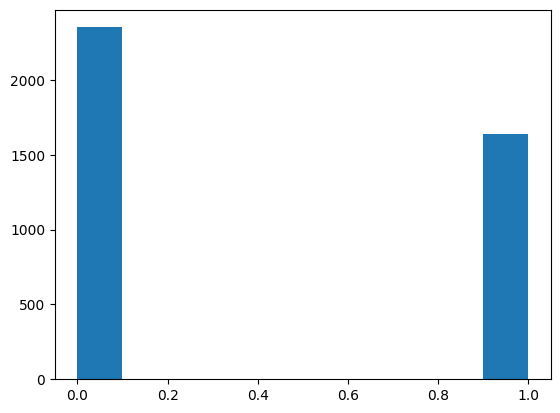

In [ ]:
plt.hist(y_train);

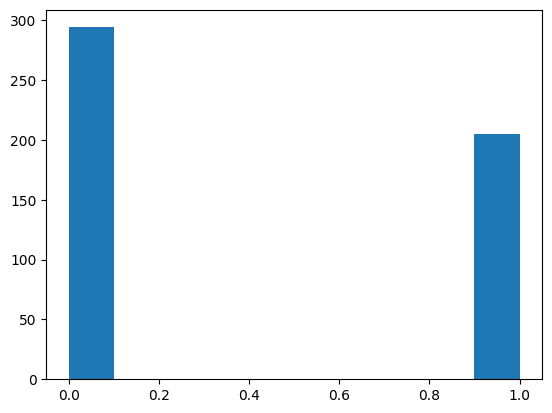

In [ ]:
plt.hist(y_test);

#### Explore the dataset

In [ ]:
domain_names[5]

'cuoi.tuoitre.vn'

In [ ]:
domain_names[25]

'tuoitre.vn'

##### Label 1 - is sarcastic

In [ ]:
labels, counts = np.unique(df.encoded_domain_name[df.is_sarcastic==1], return_counts=True)

In [ ]:
for label, count in zip(labels, counts):
    print(f"{domain_names[label]}: {count} \t percentage {count*100/(df.encoded_domain_name == label).sum():.2f}%")

24h.com.vn: 27 	 percentage 100.00%
2sao.vn: 2 	 percentage 100.00%
baothanhhoa.vn: 9 	 percentage 100.00%
bongdaplus.vn: 1 	 percentage 100.00%
cuoi.tuoitre.vn: 1599 	 percentage 99.26%
cuoituan.tuoitre.vn: 1 	 percentage 33.33%
dantri.com.vn: 4 	 percentage 13.79%
doisongphapluat.com: 6 	 percentage 40.00%
facebook.com: 15 	 percentage 100.00%
kenh14.vn: 166 	 percentage 86.46%
kienthuc.net.vn: 1 	 percentage 100.00%
laodong.vn: 2 	 percentage 13.33%
lifestyle.zingnews.vn: 19 	 percentage 48.72%
nguoiduatin.vn: 1 	 percentage 100.00%
saostar.vn: 11 	 percentage 68.75%
soha.vn: 1 	 percentage 100.00%
spiderum.com: 47 	 percentage 88.68%
thanhnien.vn: 2 	 percentage 0.39%
tuoitre.vn: 24 	 percentage 1.45%
vietnamnet.vn: 21 	 percentage 84.00%
vnexpress.net: 38 	 percentage 16.24%
vov.vn: 1 	 percentage 100.00%
vtv.vn: 1 	 percentage 1.28%
we25.vn: 1 	 percentage 100.00%
xabuon.com: 10 	 percentage 100.00%
youtube.com: 37 	 percentage 26.62%
zingnews.vn: 1 	 percentage 12.50%


It can be seen that this dataset is completely biased that most headlines from cuoi.tuoitre.vn are sarcastic.

##### Label 0 - is not sarcastic

In [ ]:
labels, counts = np.unique(df.encoded_domain_name[df.is_sarcastic==0], return_counts=True)

In [ ]:
for label, count in zip(labels, counts):
    print(f"{domain_names[label]}: {count} \t percentage {count*100/(df.encoded_domain_name == label).sum():.2f}%")

antv.gov.vn: 17 	 percentage 100.00%
cuoi.tuoitre.vn: 12 	 percentage 0.74%
cuoituan.tuoitre.vn: 2 	 percentage 66.67%
dantri.com.vn: 25 	 percentage 86.21%
doanhnghiepvn.vn: 1 	 percentage 100.00%
doisongphapluat.com: 9 	 percentage 60.00%
kenh14.vn: 26 	 percentage 13.54%
laodong.vn: 13 	 percentage 86.67%
lifestyle.zingnews.vn: 20 	 percentage 51.28%
nhandan.vn: 223 	 percentage 100.00%
phapluat.tuoitrethudo.com.vn: 1 	 percentage 100.00%
podcast.tuoitre.vn: 1 	 percentage 100.00%
saostar.vn: 5 	 percentage 31.25%
spiderum.com: 6 	 percentage 11.32%
tech.zingnews.vn: 8 	 percentage 100.00%
thanhnien.vn: 513 	 percentage 99.61%
thesaigontimes.vn: 8 	 percentage 100.00%
tuoitre.vn: 1632 	 percentage 98.55%
tuyengiao.vn: 1 	 percentage 100.00%
video.vnexpress.net: 1 	 percentage 100.00%
vietnamnet.vn: 4 	 percentage 16.00%
vneconomy.vn: 6 	 percentage 100.00%
vnexpress.net: 196 	 percentage 83.76%
vtc.vn: 23 	 percentage 100.00%
vtv.vn: 77 	 percentage 98.72%
youtube.com: 102 	 percent

It can be seen that this dataset is completely biased that most headlines from tuoitre.vn are not sarcastic.

In [ ]:
df.describe()

,is_sarcastic,encoded_headline_0,encoded_headline_1,encoded_headline_2,encoded_headline_3,encoded_headline_4,encoded_headline_5,encoded_headline_6,encoded_headline_7,encoded_headline_8,...,encoded_headline_41,encoded_headline_42,encoded_headline_43,encoded_headline_44,encoded_headline_45,encoded_headline_46,encoded_headline_47,encoded_headline_48,encoded_headline_49,encoded_domain_name
count,4987.000000,4987.0,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,...,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,0.410668,0.0,9989.328253,5519.303389,4959.386004,4155.864047,3963.771205,3880.249048,3659.103268,3518.616804,...,1.565871,3.081813,17.835974,1.000602,1.336074,5.075797,12.124524,1.222579,1.000201,17.473631
std,0.492004,0.0,12587.654109,11078.397298,10346.993906,9188.011361,8920.106136,8856.144679,8653.310344,8550.891849,...,39.566502,111.598635,927.390460,0.031661,23.733092,287.827468,785.599344,15.718218,0.014161,10.110037
min,0.000000,0.0,22.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.0,1193.000000,219.000000,104.000000,101.000000,82.000000,72.500000,47.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
50%,0.000000,0.0,4807.000000,1066.000000,862.000000,612.000000,579.000000,505.000000,397.000000,335.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000
75%,1.000000,0.0,13248.000000,4591.500000,4036.000000,3163.500000,3069.000000,2998.500000,2671.000000,2357.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
max,1.000000,0.0,63151.000000,62372.000000,63356.000000,63356.000000,61538.000000,61685.000000,61218.000000,61920.000000,...,2795.000000,7220.000000,61538.000000,3.000000,1677.000000,20327.000000,55479.000000,1111.000000,2.000000,37.000000


### Final Conclusion

Trong bài tập này, nhóm chú trọng vào việc preprocess data.

Để phân loại headlines, nhóm đã sử dụng SVM kernel rbf, một model máy học truyền thống để thực hiện phân loại. Lý do sử dụng SVM kernel rbf vì nó có khả năng nhận biết pattern trong cả linear và non-linear data. Kết hợp với kỹ thuật cross validation, nhóm đã tránh được khả năng overfitting của SVM.

Accuracy đạt được khi có bổ sung thông tin domain_name của article là 0.95, khi không có là 0.85, một kết quả cũng tương đối cao.

Tuy nhiên có thể thấy rằng, khi bổ sung domain_name - thông tin được trích từ article_link, có một vấn đề xảy ra đó là nó sẽ bias thành bài toán domain name classification vì thông qua việc khám phá dataset, có thể thấy, dataset chủ yếu chứa data thu thập từ tuoitre.vn và cuoi.tuoitre.vn, trong đó headline của cuoi.tuoitre.vn chủ yếu là sarcastic (hơn 99%) và headline của tuoitre.vn chủ yếu là non-sarcastic (hơn 98%). Khi đó có thể nói đây là bài toán domain name classification giữa domain name cuoi.tuoitre.vn và tuoitre.vn chứ không phải headline nữa. Do đó kết quả 0.95 đạt được là vì model đang classify domain_name, một bài toán dễ hơn rất nhiều so với headline.

Vậy có thể nói rằng, thông tin về article_link không quan trọng trong bài toán này. Chỉ với headline, ta vẫn có thể sử dụng SVM để tạo ra một model tương đối chính xác. Để cải thiện thì ta vẫn có thể tiếp tục fine tuning SVM hoặc chuyển sang neural network, nhưng đó là chuyện tương lai!

# Playground

How to:
1. Execute Installation above
2. Execute data prep and model prep
3. Have fun

### Data preparation for serving

In [ ]:
import numpy as np
import os, re

In [ ]:
import py_vncorenlp
%cd /content/

if 'vncorenlp' not in os.listdir('.'):

    !mkdir vncorenlp
    # Automatically download VnCoreNLP components from the original repository
    # and save them in some local machine folder
    py_vncorenlp.download_model(save_dir='/content/vncorenlp')

    # Load the word and sentence segmentation component
    rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')


/content


In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2", model_max_length=50, padding_side='right')

In [ ]:
os.listdir('.')

['.config',
 'scaler_w_link.pkl',
 'imbalanced_SVC_with_link.pkl',
 'scaler_no_link.pkl',
 'imbalanced_SVC.pkl',
 'sample_data']

In [ ]:
import pickle
%cd /content/

if 'scaler_no_link.pkl' not in os.listdir('.'):
    !wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/scaler_no_link.pkl
scaler_no_link = pickle.load(open('scaler_no_link.pkl', 'rb'))

/content
--2023-07-02 14:07:52--  https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/scaler_no_link.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15862 (15K) [application/octet-stream]
Saving to: ‘scaler_no_link.pkl’

scaler_no_link.pkl  100%[===================>]  15.49K  --.-KB/s    in 0.001s  

2023-07-02 14:07:53 (10.5 MB/s) - ‘scaler_no_link.pkl’ saved [15862/15862]



In [ ]:
import pickle
%cd /content/

if 'scaler_w_link.pkl' not in os.listdir('.'):
    !wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/scaler_w_link.pkl
scaler_w_link = pickle.load(open('scaler_w_link.pkl', 'rb'))

/content
--2023-07-02 14:07:48--  https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/scaler_w_link.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31262 (31K) [application/octet-stream]
Saving to: ‘scaler_w_link.pkl’

scaler_w_link.pkl   100%[===================>]  30.53K  --.-KB/s    in 0.002s  

2023-07-02 14:07:49 (16.6 MB/s) - ‘scaler_w_link.pkl’ saved [31262/31262]



In [ ]:
domain_names = ['24h.com.vn',
                '2sao.vn',
                'antv.gov.vn',
                'baothanhhoa.vn',
                'bongdaplus.vn',
                'cuoi.tuoitre.vn',
                'cuoituan.tuoitre.vn',
                'dantri.com.vn',
                'doanhnghiepvn.vn',
                'doisongphapluat.com',
                'facebook.com',
                'kenh14.vn',
                'kienthuc.net.vn',
                'laodong.vn',
                'lifestyle.zingnews.vn',
                'nguoiduatin.vn',
                'nhandan.vn',
                'phapluat.tuoitrethudo.com.vn',
                'podcast.tuoitre.vn',
                'saostar.vn',
                'soha.vn',
                'spiderum.com',
                'tech.zingnews.vn',
                'thanhnien.vn',
                'thesaigontimes.vn',
                'tuoitre.vn',
                'tuyengiao.vn',
                'video.vnexpress.net',
                'vietnamnet.vn',
                'vneconomy.vn',
                'vnexpress.net',
                'vov.vn',
                'vtc.vn',
                'vtv.vn',
                'we25.vn',
                'xabuon.com',
                'youtube.com',
                'zingnews.vn']

In [ ]:
def get_domain_name(link):
    return re.search(r'^(?:https?://)?(?:www.)?(\w+(?:[.-]\w+)*)\b', link).groups()[0]

In [ ]:
def create_single_sample(headline, article_link, has_link=True) :
    try:
        left_part, right_part = df.at[i, 'headline'].rsplit('-', 1)
        if right_part == ' Tuổi Trẻ Online':
            headline = left_part
    except:
        pass

    segmented_headline = rdrsegmenter.word_segment(headline)
    headline = ' '.join(segmented_headline)

    sample_input_ids = torch.tensor([tokenizer(headline, padding='max_length')['input_ids']])
    sample_attention_mask = torch.tensor([tokenizer(headline, padding='max_length')['attention_mask']])

    with torch.no_grad():
        sample_features = phobert(sample_input_ids, attention_mask=sample_attention_mask)

    encoded_headline = sample_features[0][:,0,:].numpy()
    if not has_link: return scaler_no_link.transform(np.array(encoded_headline))

    domain_name = get_domain_name(article_link)
    if (domain_name in domain_names):
        encoded_domain_name = domain_names.index(domain_name)
    else: encoded_domain_name = len(domain_names)

    return scaler_w_link.transform(np.append(encoded_headline, encoded_domain_name).reshape(1,-1))

In [ ]:
create_single_sample('Ông Giáp bán bánh mì đầu ngõ', 'tingia.vn/ong-giap-ban-banh-mi').shape

(1, 769)

### Model preparation for serving

In [ ]:
import pickle
%cd /content/

/content


In [ ]:
## uncomment those lines if you want to use balanced model
# !wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/balanced_SVC.pkl
# clf_svmrbf = pickle.load(open('balanced_SVC.pkl', 'rb'))

In [ ]:
!wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/imbalanced_SVC.pkl
clf_svmrbf = pickle.load(open('imbalanced_SVC.pkl', 'rb'))

--2023-07-02 14:09:34--  https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/imbalanced_SVC.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16946048 (16M) [application/octet-stream]
Saving to: ‘imbalanced_SVC.pkl’

imbalanced_SVC.pkl  100%[===================>]  16.16M   101MB/s    in 0.2s    

2023-07-02 14:09:34 (101 MB/s) - ‘imbalanced_SVC.pkl’ saved [16946048/16946048]



In [ ]:
import pickle
%cd /content/

/content


In [ ]:
# !wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/balanced_SVC_with_link.pkl
# clf_svmrbf_l = pickle.load(open('balanced_SVC_with_link.pkl', 'rb'))

In [ ]:
!wget https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/imbalanced_SVC_with_link.pkl
clf_svmrbf_l = pickle.load(open('imbalanced_SVC_with_link.pkl', 'rb'))

--2023-07-02 14:09:35--  https://raw.githubusercontent.com/uyenbhku/CS114.N21/main/sarcasm_detection_dataset/imbalanced_SVC_with_link.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8321067 (7.9M) [application/octet-stream]
Saving to: ‘imbalanced_SVC_with_link.pkl’

imbalanced_SVC_with 100%[===================>]   7.94M  --.-KB/s    in 0.1s    

2023-07-02 14:09:35 (65.9 MB/s) - ‘imbalanced_SVC_with_link.pkl’ saved [8321067/8321067]



### Serving

In [ ]:
#@title Have fun without link
test_headline = input('Give me headline: ')
test_link = ''

res = clf_svmrbf.predict(create_single_sample(test_headline, test_link, has_link=False))

if res[0] == 1:
    print('Is sarcastic')
else: print('Is not sarcastic')

Give me headline: Kim Uyên xinh đẹp
Is not sarcastic


In [ ]:
#@title Have fun without link
test_headline = input('Give me headline: ')
test_link = ''

res = clf_svmrbf.predict(create_single_sample(test_headline, test_link, has_link=False))

if res[0] == 1:
    print('Is sarcastic')
else: print('Is not sarcastic')

Give me headline: Tăng trưởng GDP Việt Nam 2023
Is not sarcastic


In [ ]:
#@title Have fun without link
test_headline = input('Give me headline: ')
test_link = ''

res = clf_svmrbf.predict(create_single_sample(test_headline, test_link, has_link=False))

if res[0] == 1:
    print('Is sarcastic')
else: print('Is not sarcastic')

Give me headline: Ông Giáp bán bánh mì đầu ngỏ bị bà Mai nhìn thấy và cái kết đắng
Is sarcastic


In [ ]:
#@title Have fun
test_headline = input('Give me headline: ')
test_link = input('Give me the link to that article: ')

res = clf_svmrbf_l.predict(create_single_sample(test_headline, test_link))

if res[0] == 1:
    print('Is sarcastic')
else: print('Is not sarcastic')

Give me headline: Ông Giáp bán bánh mì đầu ngỏ bị bà Mai nhìn thấy và cái kết đắng
Give me the link to that article: cuoi.tuoitre.vn/ong-giap
Is sarcastic


In [ ]:
#@title Have fun
test_headline = input('Give me headline: ')
test_link = input('Give me the link to that article: ')

res = clf_svmrbf_l.predict(create_single_sample(test_headline, test_link))

if res[0] == 1:
    print('Is sarcastic')
else: print('Is not sarcastic')

Give me headline: Ông Giáp bán bánh mì đầu ngỏ bị bà Mai nhìn thấy và cái kết đắng
Give me the link to that article: tingia.vn/ong-giap-ban-banh-mi
Is not sarcastic


In [ ]:
#@title Have fun
test_headline = input('Give me headline: ')
test_link = input('Give me the link to that article: ')

res = clf_svmrbf_l.predict(create_single_sample(test_headline, test_link))

if res[0] == 1:
    print('Is sarcastic')
else: print('Is not sarcastic')

Give me headline: Ông Giáp bán bánh mì đầu ngỏ bị bà Mai nhìn thấy và cái kết đắng
Give me the link to that article: tuoitre.vn/ong-giap-ban-banh-mi
Is not sarcastic
